## Przykłady testów 
### Temat: Algorytmy numerycznego rozwiązywaniarównań różniczkowych zwyczajnych 

### import bibliotek

In [65]:
import math
import matplotlib.pyplot as plt
import time
from abc import ABC, abstractmethod
from scipy import integrate
import numpy as np

from numericalODE import RK4, Euler, Blad
from functions import fun_exp, lot_volt_f, lot_volt_g, to_1dim, exact
print("Import gotowy...")

Import gotowy...


### funkcje

In [71]:
def Lot_Volt(X, t, params_):
    """ Do Scipy """
    return np.array([ params_[0]*X[0] -   params_[1]*X[0]*X[1] ,params_[2]*X[0]*X[1] - params_[3]*X[1] ])

### wartości początkowe

In [49]:
t = 0.0
t_stop = 80.0

dt = 0.1
dt_e = 0.05

y = 1.0
y0 = [30,4]
func = fun_exp

params = {
    'a': 0.2,   # współczynnik nardzin ofiar
    'b': 0.04,   # czestotliwosc umierania ofiar
    'c': 0.04,   # przyrost drapieżników
    'd': 0.5    # umieranie drapieżnikow
    }
# tuple
params_ =[v for _, v in params.items()]
params_= tuple(params_)


### Tworzenie obiektów Euler i RK4

In [3]:
euler_1 = Euler(fun_exp, y, t, t_stop, dt)
rk4_1 = RK4(fun_exp, y, t, t_stop, dt)

### wywołanie metod obliczających układ równań

In [75]:
Ye_2dim, Te_2dim= euler_1.licz_uklad_rownan(f=lot_volt_f, g=lot_volt_g, u=y0, params=params)
Yrk_2dim, Trk_2dim= rk4_1.licz_uklad_rownan(f=lot_volt_f, g=lot_volt_g, u=y0, params=params)

# rozbicie wyniku na ofiary i drapieżników
preyRK, predRK = to_1dim(Yrk_2dim)
preyE, predE = to_1dim(Ye_2dim)

### Wizualizacja

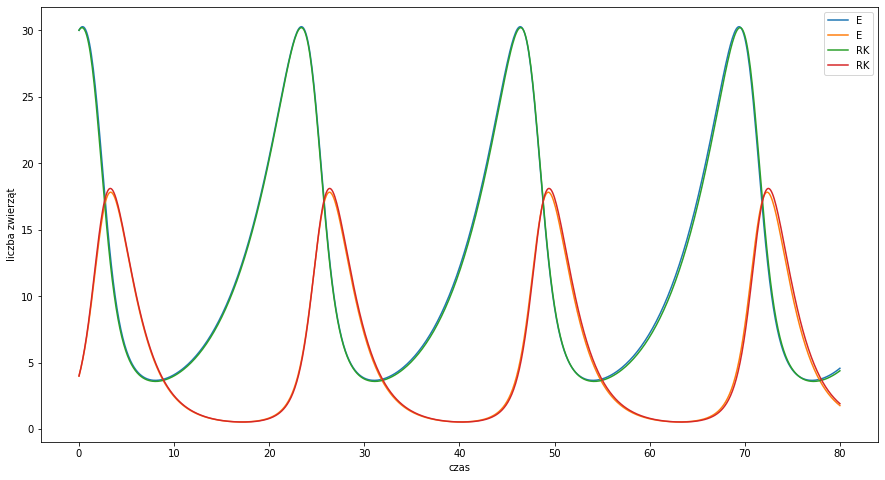

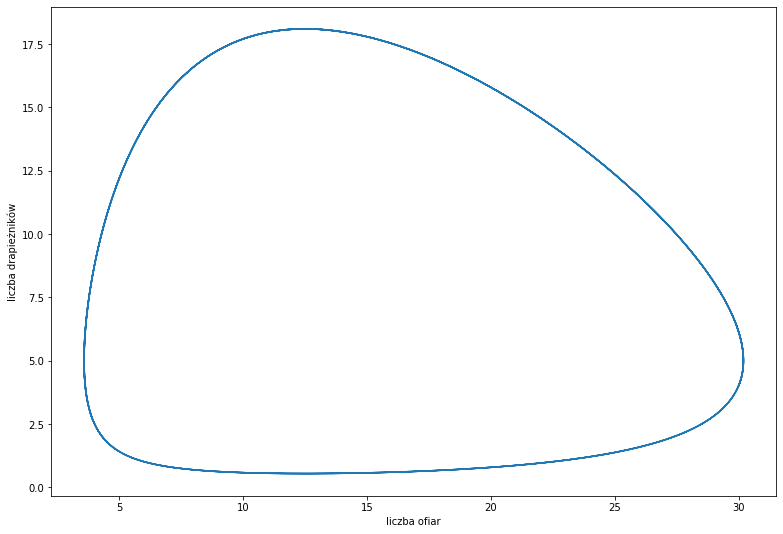

In [76]:
plt.figure(figsize=(15,8))
plt.plot(Te_2dim, Ye_2dim, label="E")
plt.plot(Trk_2dim, Yrk_2dim, label="RK")
plt.xlabel("czas")
plt.ylabel("liczba zwierząt")
plt.legend()
plt.show()

plt.figure(figsize=(13,9))
plt.plot(preyRK, predRK, label="RK")
plt.xlabel("liczba ofiar")
plt.ylabel("liczba drapieżników")
plt.show()

### Scipy - Lotki-Volterry

In [77]:
#scipy
st=time.time()
sol_LVrk = integrate.odeint(Lot_Volt, y0, Trk_2dim, args=(params_,))
en=time.time()
print(en-st)

st=time.time()
sol_LVe, infodict = integrate.odeint(Lot_Volt, y0, Te_2dim, full_output=True, args=(params_,))
en=time.time()
print(en-st)

0.003988504409790039
0.003988981246948242


In [78]:
#liczenie błędów

bladLV = Blad(sol_LVe[:,0], preyE)
blad_preyODE_E = bladLV.licz_wzg()

bladLV = Blad(sol_LVe[:,1], predE)
blad_predODE_E = bladLV.licz_wzg()

bladLV = Blad(sol_LVrk[:,0], preyRK)
blad_preyODE_RK = bladLV.licz_wzg()

bladLV = Blad(sol_LVrk[:,1], predRK)
blad_predODE_RK = bladLV.licz_wzg()

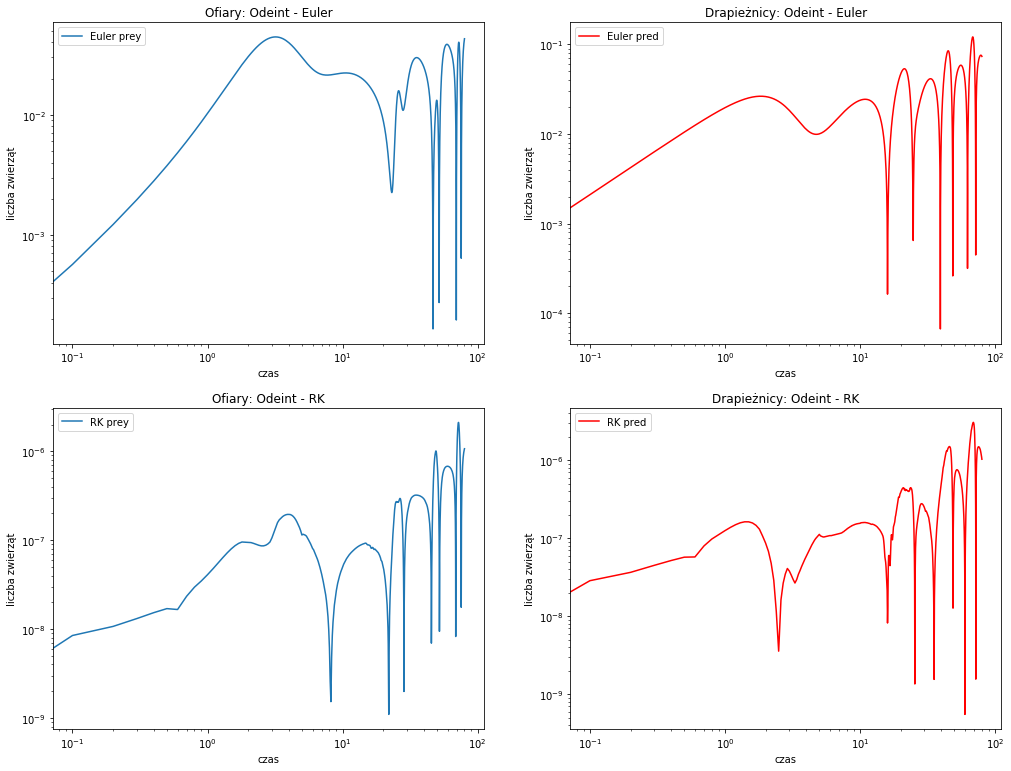

In [79]:
fig, axs = plt.subplots(2, 2,figsize=(17,13))

axs[0, 0].plot(Te_2dim, blad_preyODE_E,label="Euler prey")
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].set_ylabel("liczba zwierząt")
axs[0, 0].set_xlabel("czas")
axs[0, 0].legend()
axs[0, 0].set_title('Ofiary: Odeint - Euler')

axs[0, 1].plot(Te_2dim, blad_predODE_E,label="Euler pred", color="red")
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")
axs[0, 1].set_ylabel("liczba zwierząt")
axs[0, 1].set_xlabel("czas")
axs[0, 1].legend()
axs[0, 1].set_title('Drapieżnicy: Odeint - Euler')

axs[1, 0].plot(Trk_2dim, blad_preyODE_RK,label="RK prey")
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].set_ylabel("liczba zwierząt")
axs[1, 0].set_xlabel("czas")
axs[1, 0].legend()
axs[1, 0].set_title('Ofiary: Odeint - RK')

axs[1, 1].plot(Trk_2dim, blad_predODE_RK,label="RK pred", color="red")
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_ylabel("liczba zwierząt")
axs[1, 1].set_xlabel("czas")
axs[1, 1].legend()
axs[1, 1].set_title('Drapieżnicy: Odeint - RK')

plt.show()


## Testy - równanie różniczkowe

In [35]:
t_stop = 40
euler_2 = Euler(fun_exp, y, t, t_stop, dt)
rk4_2 = RK4(fun_exp, y, t, t_stop, dt)

Ye, Te = euler_2.licz()
Yrk, Trk = rk4_2.licz()

sol45 = integrate.solve_ivp(fun_exp, [t,t_stop], [y], method='RK45')
sol23 = integrate.solve_ivp(fun_exp, [t,t_stop], [y], method='RK23')

Y_exact_e = exact(dt_e, t_stop, y)
Y_exact_rk = exact(dt, t_stop, y)

### Liczenie czasu na różnych krokach czasowych

In [36]:
dt=0.4
t_stop=40
Y = []
DT= []
Ye = []
DTe= []

for x in range(16):
    DT.append(dt)
    Y_rkl, t_score = rk4_2.licz_czas(dt,t_stop)
    Y.append([Y_rkl, t_score])    
    dt = dt/2

    
dt=0.4
t_stop=40

for x in range(16):
    DTe.append(dt)
    Y_el, t_score_e = euler_2.licz_czas(dt,t_stop)
    Ye.append([Y_el, t_score_e])    
    dt = dt/2

In [37]:
# listy Y,Ye są rozbijane na listy jednowymiarowe
Y_rk40, t_score = to_1dim(Y)
Y_e40, t_score_e = to_1dim(Ye)

# przypisywany ostatni wynik(na t=40)
Y_sc23 = sol23.y[-1][-1]
Y_sc45 = sol45.y[-1][-1]

# RK4 błąd względem Scipy
Y_error23 = [math.fabs((Y_sc23-x)/Y_sc23) for x in Y_rk40]
Y_error45 = [math.fabs((Y_sc45-x)/Y_sc45) for x in Y_rk40]

#Euler błąd względem Scipy
Y_error23e = [math.fabs((Y_sc23-x)/Y_sc23) for x in Y_e40]
Y_error45e = [math.fabs((Y_sc45-x)/Y_sc45) for x in Y_e40]

# błędy względem metod analitycznej
Y_errorRK = [math.fabs((Y_exact_rk[-1]-x)/Y_exact_rk[-1]) for x in Y_rk40]
Y_errorE = [math.fabs((Y_exact_e[-1]-x)/Y_exact_e[-1]) for x in Y_e40]

### Wizualizacja testów

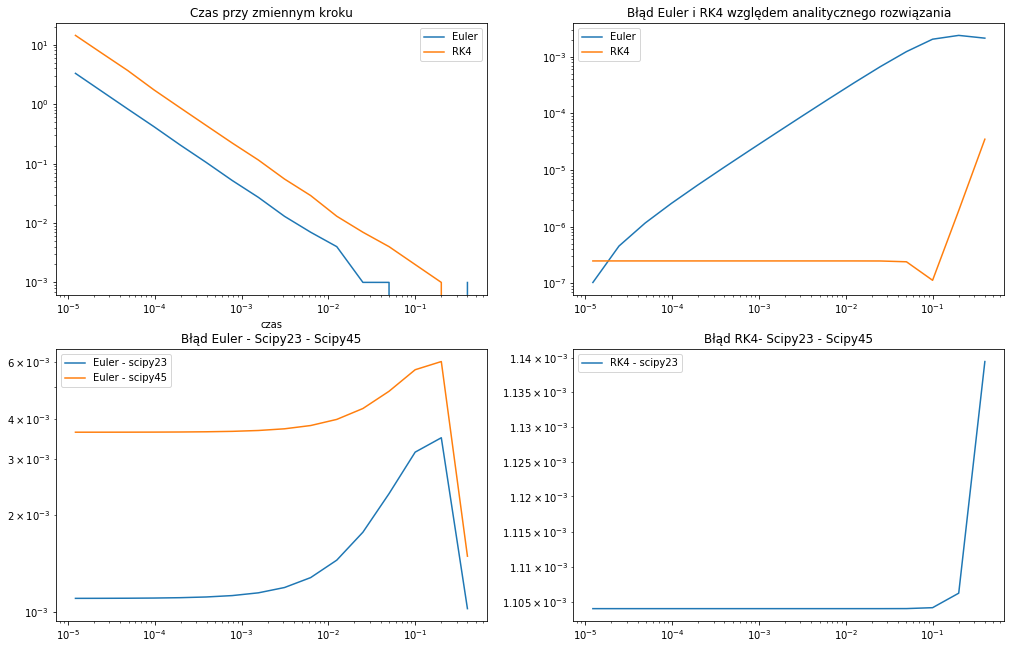

In [39]:
fig, axs = plt.subplots(2, 2,figsize=(17,11))

axs[0, 0].plot(DT,t_score_e,label="Euler")
axs[0, 0].plot(DT,t_score,label="RK4")
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].set_xlabel("dt")
axs[0, 0].set_xlabel("czas")
axs[0, 0].legend()
axs[0, 0].set_title('Czas przy zmiennym kroku')

axs[0, 1].plot(DT, Y_errorE,label="Euler")
axs[0, 1].plot(DT, Y_errorRK,label="RK4")
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")
axs[0, 1].legend()
axs[0, 1].set_title('Błąd Euler i RK4 względem analitycznego rozwiązania')

axs[1, 0].plot(DT, Y_error23e, label="Euler - scipy23")
axs[1, 0].plot(DT, Y_error45e, label="Euler - scipy45")
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].legend()
axs[1, 0].set_title('Błąd Euler - Scipy23 - Scipy45')

axs[1, 1].plot(DT, Y_error23, label="RK4 - scipy23")
# axs[1, 1].plot(DT, Y_error45, label="RK4 - scipy45")
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].legend()
axs[1, 1].set_title('Błąd RK4- Scipy23 - Scipy45')
plt.show()

### Wizualizacja funkcji (metoda RK4 i adaptacyjne dobieranie kroków przez metody Scipy)

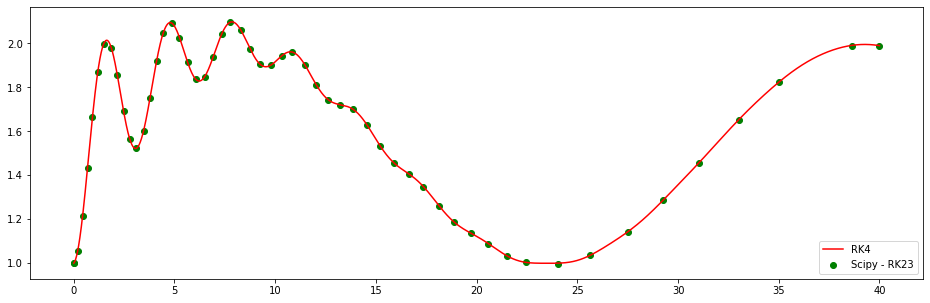

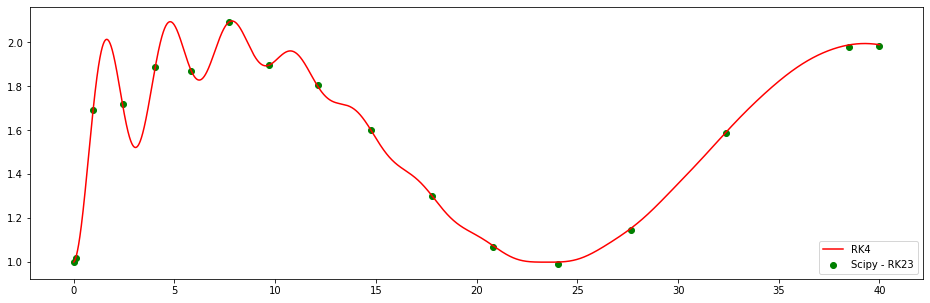

In [41]:
plt.figure(figsize=(16,5))
plt.plot(Trk,Yrk, color="red", label="RK4")
plt.scatter(sol23.t, sol23.y, color="green", label="Scipy - RK23")
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.plot(Trk,Yrk, color="red", label="RK4")
plt.scatter(sol45.t, sol45.y, color="green", label="Scipy - RK23")
plt.legend()
plt.show()